In [60]:
! pip install tensorflow
! pip install keras
! pip install np_utils
! pip install seaborn

PREPARING THE TOOLS

In [2]:
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
# Models from Sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, classification_report, log_loss
from math import sqrt

from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from numpy import argmax
from tensorflow.keras import layers
import tensorflow.compat.v1 as tf
from tensorflow.keras.optimizers import SGD
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from datetime import datetime
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})


In [136]:
import tensorflow
tensorflow.__version__

'2.7.0'

In [137]:
from tensorflow.keras.models import Sequential  # used to create neural network (a sequesnce of layers)
from tensorflow.keras.layers import Dense # one neuron in one layer connected to all other layers in the next layer
from keras.utils import np_utils

# THREE ACTIVITIES WERE CARRIED OUT; JUMPING, WALKING, SWINGING

In [62]:
Jumping_Acc = pd.read_excel('Jumping_Acceleration.xlsx',sheet_name='Sheet1')
Jumping_AngV = pd.read_excel('Jumping_AngularVelo.xlsx',sheet_name='Sheet1')
Jumping_Mag = pd.read_excel('Jumping_MagneticField.xlsx',sheet_name='Sheet1')
Jumping_Orin = pd.read_excel('Jumping_Orientation.xlsx',sheet_name='Sheet1')

In [63]:
Walking_Acc = pd.read_excel('Walking_Acceleration.xlsx',sheet_name='Sheet1')
Walking_AngV = pd.read_excel('Walking_AngularVelo.xlsx',sheet_name='Sheet1')
Walking_Mag = pd.read_excel('Walking_MagneticField.xlsx',sheet_name='Sheet1')
Walking_Orin = pd.read_excel('Walking_Orientation.xlsx',sheet_name='Sheet1')

Swinging_Acc = pd.read_excel('Swinging_Acceleration.xlsx',sheet_name='Sheet1')
Swinging_AngV = pd.read_excel('Swinging_AngularVelo.xlsx',sheet_name='Sheet1')
Swinging_Mag = pd.read_excel('Swinging_MagneticField.xlsx',sheet_name='Sheet1')
Swinging_Orin = pd.read_excel('Swinging_Orientation.xlsx',sheet_name='Sheet1')

In [64]:
Walking_Acc.info()
Walking_AngV.info()
Walking_Mag.info()
Walking_Orin.info()

Swinging_Acc.info()
Swinging_AngV.info()
Swinging_Mag.info()
Swinging_Orin.info()

Jumping_Acc.info()
Jumping_AngV.info()
Jumping_Mag.info()
Jumping_Orin.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  2420 non-null   datetime64[ns]
 1   Acc_X      2420 non-null   float64       
 2   Acc_Y      2420 non-null   float64       
 3   Acc_Z      2420 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 75.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  2420 non-null   datetime64[ns]
 1   AngV_X     2420 non-null   float64       
 2   AngV_Y     2420 non-null   float64       
 3   AngV_Z     2420 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 75.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 4 columns)

In [65]:
#this helps to acheive a more uniform data to be combined
Jumping_AngV= Jumping_AngV.drop('Timestamp',axis=1)
Jumping_Mag = Jumping_Mag.drop('Timestamp',axis=1)
Jumping_Orin = Jumping_Orin.drop('Timestamp',axis=1)

#Combining the  four frames for the Jumping activity 
Combineframes = [Jumping_Acc,Jumping_AngV,Jumping_Mag,Jumping_Orin]

Jumping_activty = pd.concat(Combineframes,axis=1)
#Inserting a new column to make the activity unique
Jumping_activty['Activity'] = 'Jumping'

# WE CAN NOW PROCEED TO DROP THE TIMESTAMP FOR angular velocity, magnetic field and orientation
Walking_AngV= Walking_AngV.drop('Timestamp',axis=1)
Walking_Mag = Walking_Mag.drop('Timestamp',axis=1)
Walking_Orin = Walking_Orin.drop('Timestamp',axis=1)

Swinging_AngV= Swinging_AngV.drop('Timestamp',axis=1)
Swinging_Mag = Swinging_Mag.drop('Timestamp',axis=1)
Swinging_Orin = Swinging_Orin.drop('Timestamp',axis=1)


#Combinining the four individual frames for the walking activity 
frames = [Walking_Acc,Walking_AngV,Walking_Mag,Walking_Orin]

Walking_activty = pd.concat(frames,axis=1)

#Create a column to identify the activity associated with each data entry 
Walking_activty['Activity'] = 'Walking'

#Combinining the four individual frames for the Swinging activity 
frames = [Swinging_Acc,Swinging_AngV,Swinging_Mag,Swinging_Orin]

Swinging_activty = pd.concat(frames,axis=1)

#Create a column to identify the activity associated with each data entry 
Swinging_activty['Activity'] = 'Swinging'


In [66]:
Jumping_activty.head()

Timestamp     Acc_X     Acc_Y      Acc_Z    AngV_X    AngV_Y  \
0 2021-11-04 13:46:53.454 -0.728086  2.423460   9.405840 -0.048007  0.056728   
1 2021-11-04 13:46:53.504 -0.260458  2.561024   9.757310 -0.155276  0.105361   
2 2021-11-04 13:46:53.554 -0.444426  2.381398  10.268197 -0.061411  0.066081   
3 2021-11-04 13:46:53.604 -0.498164  2.321073  10.175540 -0.145513 -0.116344   
4 2021-11-04 13:46:53.654 -0.863554  2.080374  10.311008 -0.222038  0.047301   

     AngV_Z      Mag_X     Mag_Y      Mag_Z     Orin_X     Orin_Y    Orin_Z  \
0 -0.095252  11.312111  4.744831 -48.078960 -89.777458 -12.492798  2.032986   
1  0.088088  11.674408  5.292308 -47.740788 -89.994279 -12.009416  2.313696   
2  0.026160  11.852859  5.305964 -47.905605 -89.992136 -11.771272  2.438837   
3 -0.053890  11.679813  5.366184 -47.693722 -89.851468 -11.411117  2.250633   
4 -0.048109  11.713608  5.991796 -47.753902 -89.700464 -10.794805  2.351557   

  Activity  
0  Jumping  
1  Jumping  
2  Jumping  
3  Jumping  
4  Jumping

In [67]:
Walking_activty.head()

Timestamp     Acc_X     Acc_Y      Acc_Z    AngV_X    AngV_Y  \
0 2021-11-04 13:49:09.040  1.229693  2.698888   9.723630  0.559261 -0.960100   
1 2021-11-04 13:49:09.090  0.393083  1.822610  10.601404  0.261506 -1.518713   
2 2021-11-04 13:49:09.140  0.165556  1.711840  10.223141 -0.449737 -0.831036   
3 2021-11-04 13:49:09.190  0.209714  1.868864   8.622370  0.178914 -0.602822   
4 2021-11-04 13:49:09.240  0.779579  1.484313   9.543255  0.188326 -0.798309   

     AngV_Z      Mag_X      Mag_Y      Mag_Z     Orin_X     Orin_Y     Orin_Z  \
0 -0.103176  16.100574 -32.152283 -33.804287 -87.968027 -21.834471  10.506379   
1 -0.755855  14.173382 -32.538319 -34.434101 -85.654733 -22.299156   7.025769   
2 -1.708894  15.119671 -30.564014 -35.984112 -80.493293 -20.707061   6.217599   
3 -1.520493  16.458759 -29.779381 -36.350750 -75.627193 -20.423837   6.103005   
4 -1.841518  17.776455 -28.857830 -36.777538 -69.880713 -20.492917   6.033609   

  Activity  
0  Walking  
1  Walking  
2  Walking  
3  Walking  
4  Walking

In [68]:
Swinging_activty.head()

Timestamp     Acc_X     Acc_Y      Acc_Z    AngV_X    AngV_Y  \
0 2021-11-04 13:44:23.402 -3.916755  3.716322  11.523038  0.318225 -1.269435   
1 2021-11-04 13:44:23.452 -1.171763  3.903133  12.481944 -0.421089 -0.690267   
2 2021-11-04 13:44:23.502 -3.177293  3.689827  15.989001  1.155217 -1.740068   
3 2021-11-04 13:44:23.552 -2.886298  3.269052  11.451487  1.312166 -1.738885   
4 2021-11-04 13:44:23.602 -0.143851  3.684588   7.745194 -0.102889 -1.275409   

     AngV_Z      Mag_X     Mag_Y      Mag_Z     Orin_X     Orin_Y     Orin_Z  \
0 -0.518202  25.097141 -2.858827 -41.110081 -67.855061 -18.626277  15.858347   
1 -1.026312  22.954903 -2.058149 -42.183460 -66.034306 -18.092203  13.175374   
2 -0.742287  21.413261 -0.478672 -42.831692 -63.206210 -17.599161  11.791025   
3 -0.334614  17.377609 -2.854978 -44.676456 -60.816999 -21.156573   7.593890   
4  0.360170  13.752773 -4.194230 -45.725765 -60.371168 -23.334528   2.940960   

   Activity  
0  Swinging  
1  Swinging  
2  Swinging  
3  Swinging  
4  Swinging

In [69]:
#COMBINING THE THREE ACTIVITIES PERFORMED INTO A SINGLE FRAME
#Combining all three activities 
Every_frame = [Walking_activty,Jumping_activty,Swinging_activty]
All_activity = pd.concat(Every_frame,axis=0)

In [70]:
All_activity.tail()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
2416 2021-11-04 13:46:24.015  0.609832  2.116449  9.305549  0.324816   
2417 2021-11-04 13:46:24.065  0.800086  1.981430  9.593999  0.069633   
2418 2021-11-04 13:46:24.115  1.889371  1.433719  8.363109  0.338086   
2419 2021-11-04 13:46:24.165  0.257914  1.940864  8.489895  0.448475   
2420 2021-11-04 13:46:24.215  1.593885  2.556983  9.089848 -0.413975   

        AngV_Y    AngV_Z      Mag_X     Mag_Y      Mag_Z     Orin_X  \
2416  1.008462  0.932844   8.229614 -1.425409 -47.625797 -79.956638   
2417  1.291180  1.282872  10.854137 -2.364454 -46.967564 -83.000247   
2418  2.483122  0.902026  14.236057 -3.080599 -46.002186 -86.925147   
2419  0.348781  1.213415  17.519337 -5.015430 -44.850376 -89.326880   
2420  0.121180  1.222076  17.219299 -5.992191 -44.827938 -92.942680   

         Orin_Y    Orin_Z  Activity  
2416 -15.640605 -7.605880  Swinging  
2417 -15.854919 -5.307518  Swinging  
2418 -15.556561 -1.107416  Swinging  
2419 -17.126124  1.670303  Swinging  
2420 -17.225523  0.510678  Swinging

In [71]:
# Resetting the index would help to achieve a unified frame
All_activity = All_activity.reset_index()

All_activity.head()

index               Timestamp     Acc_X     Acc_Y      Acc_Z    AngV_X  \
0      0 2021-11-04 13:49:09.040  1.229693  2.698888   9.723630  0.559261   
1      1 2021-11-04 13:49:09.090  0.393083  1.822610  10.601404  0.261506   
2      2 2021-11-04 13:49:09.140  0.165556  1.711840  10.223141 -0.449737   
3      3 2021-11-04 13:49:09.190  0.209714  1.868864   8.622370  0.178914   
4      4 2021-11-04 13:49:09.240  0.779579  1.484313   9.543255  0.188326   

     AngV_Y    AngV_Z      Mag_X      Mag_Y      Mag_Z     Orin_X     Orin_Y  \
0 -0.960100 -0.103176  16.100574 -32.152283 -33.804287 -87.968027 -21.834471   
1 -1.518713 -0.755855  14.173382 -32.538319 -34.434101 -85.654733 -22.299156   
2 -0.831036 -1.708894  15.119671 -30.564014 -35.984112 -80.493293 -20.707061   
3 -0.602822 -1.520493  16.458759 -29.779381 -36.350750 -75.627193 -20.423837   
4 -0.798309 -1.841518  17.776455 -28.857830 -36.777538 -69.880713 -20.492917   

      Orin_Z Activity  
0  10.506379  Walking  
1   7.025769  Walking  
2   6.217599  Walking  
3   6.103005  Walking  
4   6.033609  Walking

In [72]:
All_activity.tail()

index               Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
7248   2416 2021-11-04 13:46:24.015  0.609832  2.116449  9.305549  0.324816   
7249   2417 2021-11-04 13:46:24.065  0.800086  1.981430  9.593999  0.069633   
7250   2418 2021-11-04 13:46:24.115  1.889371  1.433719  8.363109  0.338086   
7251   2419 2021-11-04 13:46:24.165  0.257914  1.940864  8.489895  0.448475   
7252   2420 2021-11-04 13:46:24.215  1.593885  2.556983  9.089848 -0.413975   

        AngV_Y    AngV_Z      Mag_X     Mag_Y      Mag_Z     Orin_X  \
7248  1.008462  0.932844   8.229614 -1.425409 -47.625797 -79.956638   
7249  1.291180  1.282872  10.854137 -2.364454 -46.967564 -83.000247   
7250  2.483122  0.902026  14.236057 -3.080599 -46.002186 -86.925147   
7251  0.348781  1.213415  17.519337 -5.015430 -44.850376 -89.326880   
7252  0.121180  1.222076  17.219299 -5.992191 -44.827938 -92.942680   

         Orin_Y    Orin_Z  Activity  
7248 -15.640605 -7.605880  Swinging  
7249 -15.854919 -5.307518  Swinging  
7250 -15.556561 -1.107416  Swinging  
7251 -17.126124  1.670303  Swinging  
7252 -17.225523  0.510678  Swinging

In [73]:
All_activity = All_activity.drop('index',axis=1)

In [74]:
All_activity.head()

Timestamp     Acc_X     Acc_Y      Acc_Z    AngV_X    AngV_Y  \
0 2021-11-04 13:49:09.040  1.229693  2.698888   9.723630  0.559261 -0.960100   
1 2021-11-04 13:49:09.090  0.393083  1.822610  10.601404  0.261506 -1.518713   
2 2021-11-04 13:49:09.140  0.165556  1.711840  10.223141 -0.449737 -0.831036   
3 2021-11-04 13:49:09.190  0.209714  1.868864   8.622370  0.178914 -0.602822   
4 2021-11-04 13:49:09.240  0.779579  1.484313   9.543255  0.188326 -0.798309   

     AngV_Z      Mag_X      Mag_Y      Mag_Z     Orin_X     Orin_Y     Orin_Z  \
0 -0.103176  16.100574 -32.152283 -33.804287 -87.968027 -21.834471  10.506379   
1 -0.755855  14.173382 -32.538319 -34.434101 -85.654733 -22.299156   7.025769   
2 -1.708894  15.119671 -30.564014 -35.984112 -80.493293 -20.707061   6.217599   
3 -1.520493  16.458759 -29.779381 -36.350750 -75.627193 -20.423837   6.103005   
4 -1.841518  17.776455 -28.857830 -36.777538 -69.880713 -20.492917   6.033609   

  Activity  
0  Walking  
1  Walking  
2  Walking  
3  Walking  
4  Walking

In [75]:
All_activity.tail()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
7248 2021-11-04 13:46:24.015  0.609832  2.116449  9.305549  0.324816   
7249 2021-11-04 13:46:24.065  0.800086  1.981430  9.593999  0.069633   
7250 2021-11-04 13:46:24.115  1.889371  1.433719  8.363109  0.338086   
7251 2021-11-04 13:46:24.165  0.257914  1.940864  8.489895  0.448475   
7252 2021-11-04 13:46:24.215  1.593885  2.556983  9.089848 -0.413975   

        AngV_Y    AngV_Z      Mag_X     Mag_Y      Mag_Z     Orin_X  \
7248  1.008462  0.932844   8.229614 -1.425409 -47.625797 -79.956638   
7249  1.291180  1.282872  10.854137 -2.364454 -46.967564 -83.000247   
7250  2.483122  0.902026  14.236057 -3.080599 -46.002186 -86.925147   
7251  0.348781  1.213415  17.519337 -5.015430 -44.850376 -89.326880   
7252  0.121180  1.222076  17.219299 -5.992191 -44.827938 -92.942680   

         Orin_Y    Orin_Z  Activity  
7248 -15.640605 -7.605880  Swinging  
7249 -15.854919 -5.307518  Swinging  
7250 -15.556561 -1.107416  Swinging  
7251 -17.126124  1.670303  Swinging  
7252 -17.225523  0.510678  Swinging

In [76]:
All_activity= All_activity.drop('Timestamp',axis=1)

In [77]:
#Save the combined dataframe into a csv file 
All_activity.to_csv(r'All_Activity1.csv', index=False)

In [78]:
All_activity.describe().T

count       mean        std         min         25%        50%  \
Acc_X   7253.0   2.705104   6.909462  -13.884078   -0.880020   0.344883   
Acc_Y   7253.0  -3.179095  10.965225  -66.550557   -4.151168   0.898432   
Acc_Z   7253.0   8.164791   7.867854  -16.445551    2.704576   8.382419   
AngV_X  7253.0   0.001208   3.261869  -16.662121   -0.598559   0.034457   
AngV_Y  7253.0  -0.024441   1.618777  -14.014662   -0.579611  -0.024712   
AngV_Z  7253.0  -0.016128   2.272296   -8.547000   -0.815759  -0.064966   
Mag_X   7253.0  -3.686865  19.144673  -47.896137  -16.262678  -0.990589   
Mag_Y   7253.0  -9.572965  19.573768  -47.842247  -25.952362 -10.362491   
Mag_Z   7253.0 -35.852039  14.043846  -54.981213  -45.838772 -41.143002   
Orin_X  7253.0 -36.812420  94.113613 -179.978714 -112.639988 -44.309419   
Orin_Y  7253.0 -17.626176  20.022240  -89.140903  -28.729249 -18.903926   
Orin_Z  7253.0 -13.452848  27.147362 -169.058936  -21.873342  -1.976602   

              75%         max  
Acc_X    2.803819   45.153603  
Acc_Y    3.260370   11.588302  
Acc_Z   10.947036   51.254765  
AngV_X   0.704398   16.731894  
AngV_Y   0.538825   12.488861  
AngV_Z   0.643540   12.232758  
Mag_X   13.260029   29.410908  
Mag_Y    4.535086   43.611988  
Mag_Z  -31.331089   21.727678  
Orin_X  21.460222  179.974143  
Orin_Y  -6.738410   46.237767  
Orin_Z   3.089671  160.930051

# Exploratory Data analysis

In [3]:
All_activity = pd.read_csv('All_Activity1.csv', engine='python')
All_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Acc_X     7253 non-null   float64
 1   Acc_Y     7253 non-null   float64
 2   Acc_Z     7253 non-null   float64
 3   AngV_X    7253 non-null   float64
 4   AngV_Y    7253 non-null   float64
 5   AngV_Z    7253 non-null   float64
 6   Mag_X     7253 non-null   float64
 7   Mag_Y     7253 non-null   float64
 8   Mag_Z     7253 non-null   float64
 9   Orin_X    7253 non-null   float64
 10  Orin_Y    7253 non-null   float64
 11  Orin_Z    7253 non-null   float64
 12  Activity  7253 non-null   object 
dtypes: float64(12), object(1)
memory usage: 736.8+ KB


<AxesSubplot:>

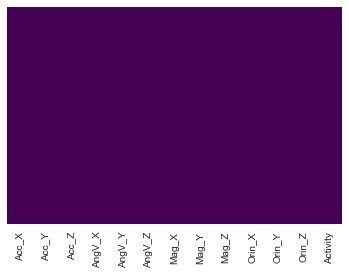

In [80]:
sb.heatmap(All_activity.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [81]:
sb.set_style('whitegrid')

In [82]:
#Check for null values 
All_activity.isnull().sum()

Acc_X       0
Acc_Y       0
Acc_Z       0
AngV_X      0
AngV_Y      0
AngV_Z      0
Mag_X       0
Mag_Y       0
Mag_Z       0
Orin_X      0
Orin_Y      0
Orin_Z      0
Activity    0
dtype: int64

In [83]:
All_activity.describe()

Acc_X        Acc_Y        Acc_Z       AngV_X       AngV_Y  \
count  7253.000000  7253.000000  7253.000000  7253.000000  7253.000000   
mean      2.705104    -3.179095     8.164791     0.001208    -0.024441   
std       6.909462    10.965225     7.867854     3.261869     1.618777   
min     -13.884078   -66.550557   -16.445551   -16.662121   -14.014662   
25%      -0.880020    -4.151168     2.704576    -0.598559    -0.579611   
50%       0.344883     0.898432     8.382419     0.034457    -0.024712   
75%       2.803819     3.260370    10.947036     0.704398     0.538825   
max      45.153603    11.588302    51.254765    16.731894    12.488861   

            AngV_Z        Mag_X        Mag_Y        Mag_Z       Orin_X  \
count  7253.000000  7253.000000  7253.000000  7253.000000  7253.000000   
mean     -0.016128    -3.686865    -9.572965   -35.852039   -36.812420   
std       2.272296    19.144673    19.573768    14.043846    94.113613   
min      -8.547000   -47.896137   -47.842247   -54.981213  -179.978714   
25%      -0.815759   -16.262678   -25.952362   -45.838772  -112.639988   
50%      -0.064966    -0.990589   -10.362491   -41.143002   -44.309419   
75%       0.643540    13.260029     4.535086   -31.331089    21.460222   
max      12.232758    29.410908    43.611988    21.727678   179.974143   

            Orin_Y       Orin_Z  
count  7253.000000  7253.000000  
mean    -17.626176   -13.452848  
std      20.022240    27.147362  
min     -89.140903  -169.058936  
25%     -28.729249   -21.873342  
50%     -18.903926    -1.976602  
75%      -6.738410     3.089671  
max      46.237767   160.930051

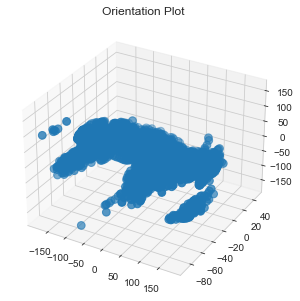

In [84]:
fig = plt.figure(figsize=(9,5))

ax = plt.axes(projection='3d')
zline = All_activity['Orin_Z']
xline = All_activity['Orin_X']
yline = All_activity['Orin_Y']
ax.scatter3D(xline, yline, zline, cmap='rainbow',s=60);
plt.title('Orientation Plot')
plt.show()

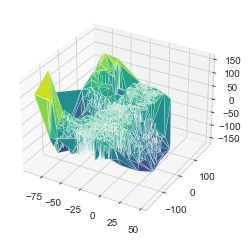

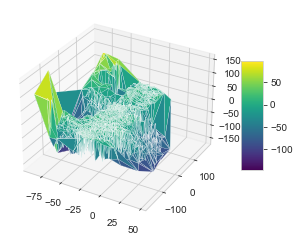

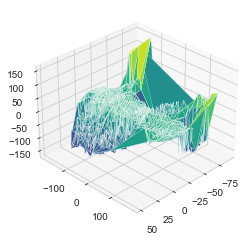

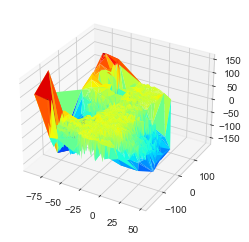

In [85]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(All_activity['Orin_Y'], All_activity['Orin_X'], All_activity['Orin_Z'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 

fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(All_activity['Orin_Y'], All_activity['Orin_X'], All_activity['Orin_Z'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()
 
# Rotate it
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(All_activity['Orin_Y'], All_activity['Orin_X'], All_activity['Orin_Z'], cmap=plt.cm.viridis, linewidth=0.2)
ax.view_init(30, 45)
plt.show()
 
# Other palette
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(All_activity['Orin_Y'], All_activity['Orin_X'], All_activity['Orin_Z'], cmap=plt.cm.jet, linewidth=0.01)
plt.show()

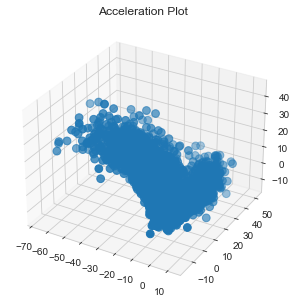

In [86]:
fig = plt.figure(figsize=(9,5))

ax = plt.axes(projection='3d')
zline = All_activity['Acc_X']
xline = All_activity['Acc_Y']
yline = All_activity['Acc_Z']
ax.scatter3D(xline, yline, zline, cmap='rainbow',s=60);
plt.title('Acceleration Plot')
plt.show()

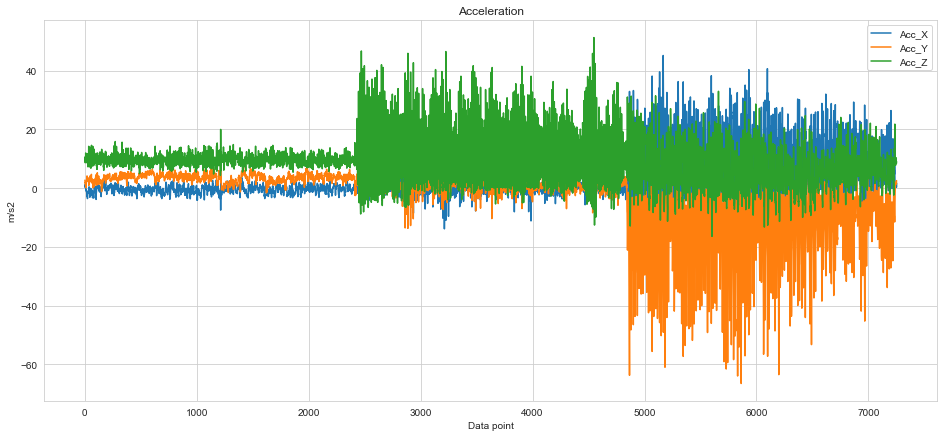

In [87]:
title='Acceleration'
ylabel='m/s2'
xlabel='Data point'

ax5 = All_activity['Acc_X'].plot(figsize=(16,7),legend=True)
ax5 = All_activity['Acc_Y'].plot(figsize=(16,7),legend=True)
ax5 = All_activity['Acc_Z'].plot(figsize=(16,7),legend=True)



ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

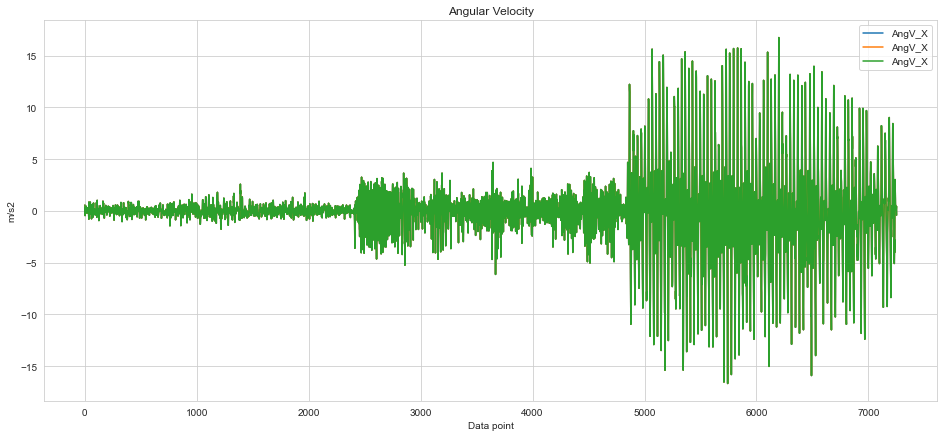

In [88]:
title='Angular Velocity'
ylabel='m/s2'
xlabel='Data point'

ax5 = All_activity['AngV_X'].plot(figsize=(16,7),legend=True)
ax5 = All_activity['AngV_X'].plot(figsize=(16,7),legend=True)
ax5 = All_activity['AngV_X'].plot(figsize=(16,7),legend=True)



ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

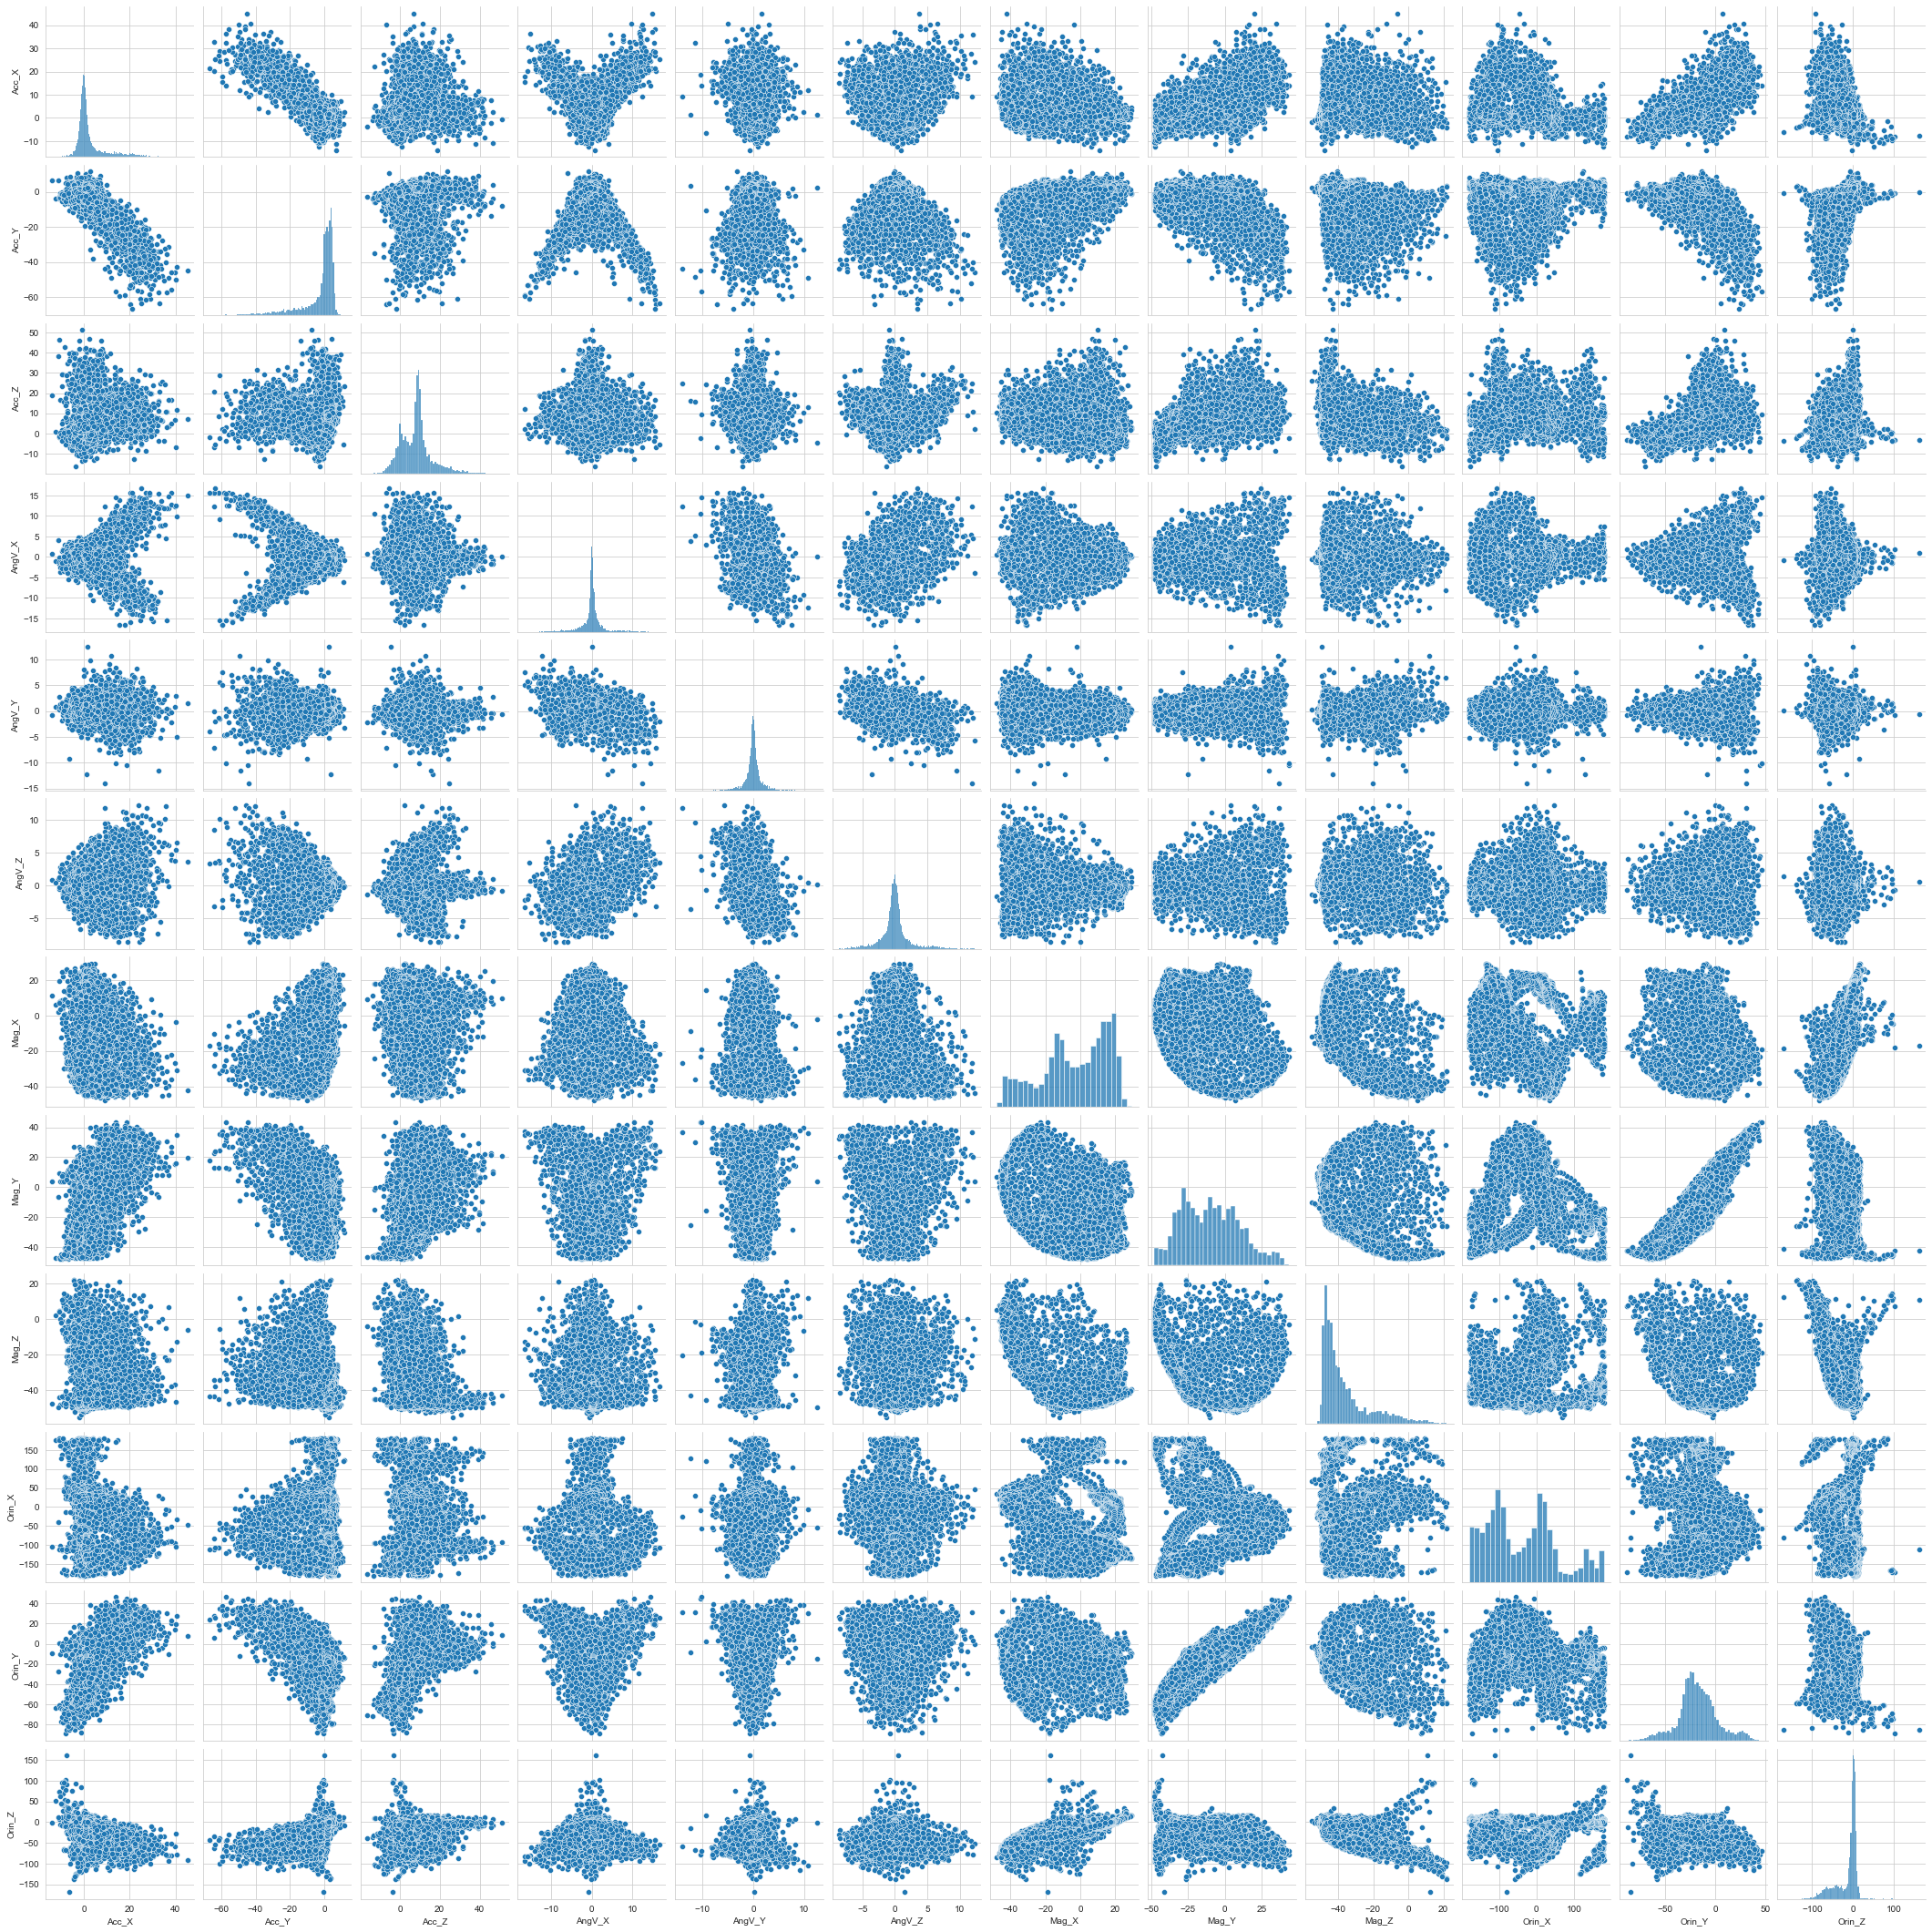

In [89]:
sb.pairplot(All_activity)

In [90]:
All_activity.corr()

Acc_X     Acc_Y     Acc_Z    AngV_X    AngV_Y    AngV_Z     Mag_X  \
Acc_X   1.000000 -0.866208  0.077117  0.063224 -0.054672  0.097786 -0.371949   
Acc_Y  -0.866208  1.000000  0.003898 -0.035293  0.038155 -0.114677  0.516426   
Acc_Z   0.077117  0.003898  1.000000 -0.025378 -0.032018  0.059465  0.012408   
AngV_X  0.063224 -0.035293 -0.025378  1.000000 -0.063197  0.268529 -0.029368   
AngV_Y -0.054672  0.038155 -0.032018 -0.063197  1.000000 -0.310361 -0.059803   
AngV_Z  0.097786 -0.114677  0.059465  0.268529 -0.310361  1.000000 -0.037084   
Mag_X  -0.371949  0.516426  0.012408 -0.029368 -0.059803 -0.037084  1.000000   
Mag_Y   0.479715 -0.469986  0.387580 -0.002401  0.023310  0.033942 -0.189210   
Mag_Z   0.212138 -0.385900 -0.238154 -0.019029  0.083284 -0.036265 -0.589564   
Orin_X -0.146085  0.051236  0.038932  0.005731  0.029908 -0.026585 -0.203879   
Orin_Y  0.589723 -0.528927  0.446986 -0.007435 -0.003462  0.033131 -0.206495   
Orin_Z -0.598522  0.706713  0.120741  0.005169 -0.045882 -0.018811  0.689823   

           Mag_Y     Mag_Z    Orin_X    Orin_Y    Orin_Z  
Acc_X   0.479715  0.212138 -0.146085  0.589723 -0.598522  
Acc_Y  -0.469986 -0.385900  0.051236 -0.528927  0.706713  
Acc_Z   0.387580 -0.238154  0.038932  0.446986  0.120741  
AngV_X -0.002401 -0.019029  0.005731 -0.007435  0.005169  
AngV_Y  0.023310  0.083284  0.029908 -0.003462 -0.045882  
AngV_Z  0.033942 -0.036265 -0.026585  0.033131 -0.018811  
Mag_X  -0.189210 -0.589564 -0.203879 -0.206495  0.689823  
Mag_Y   1.000000 -0.137859 -0.016938  0.812852 -0.310930  
Mag_Z  -0.137859  1.000000  0.162448 -0.206639 -0.688264  
Orin_X -0.016938  0.162448  1.000000 -0.053157 -0.098186  
Orin_Y  0.812852 -0.206639 -0.053157  1.000000 -0.278077  
Orin_Z -0.310930 -0.688264 -0.098186 -0.278077  1.000000

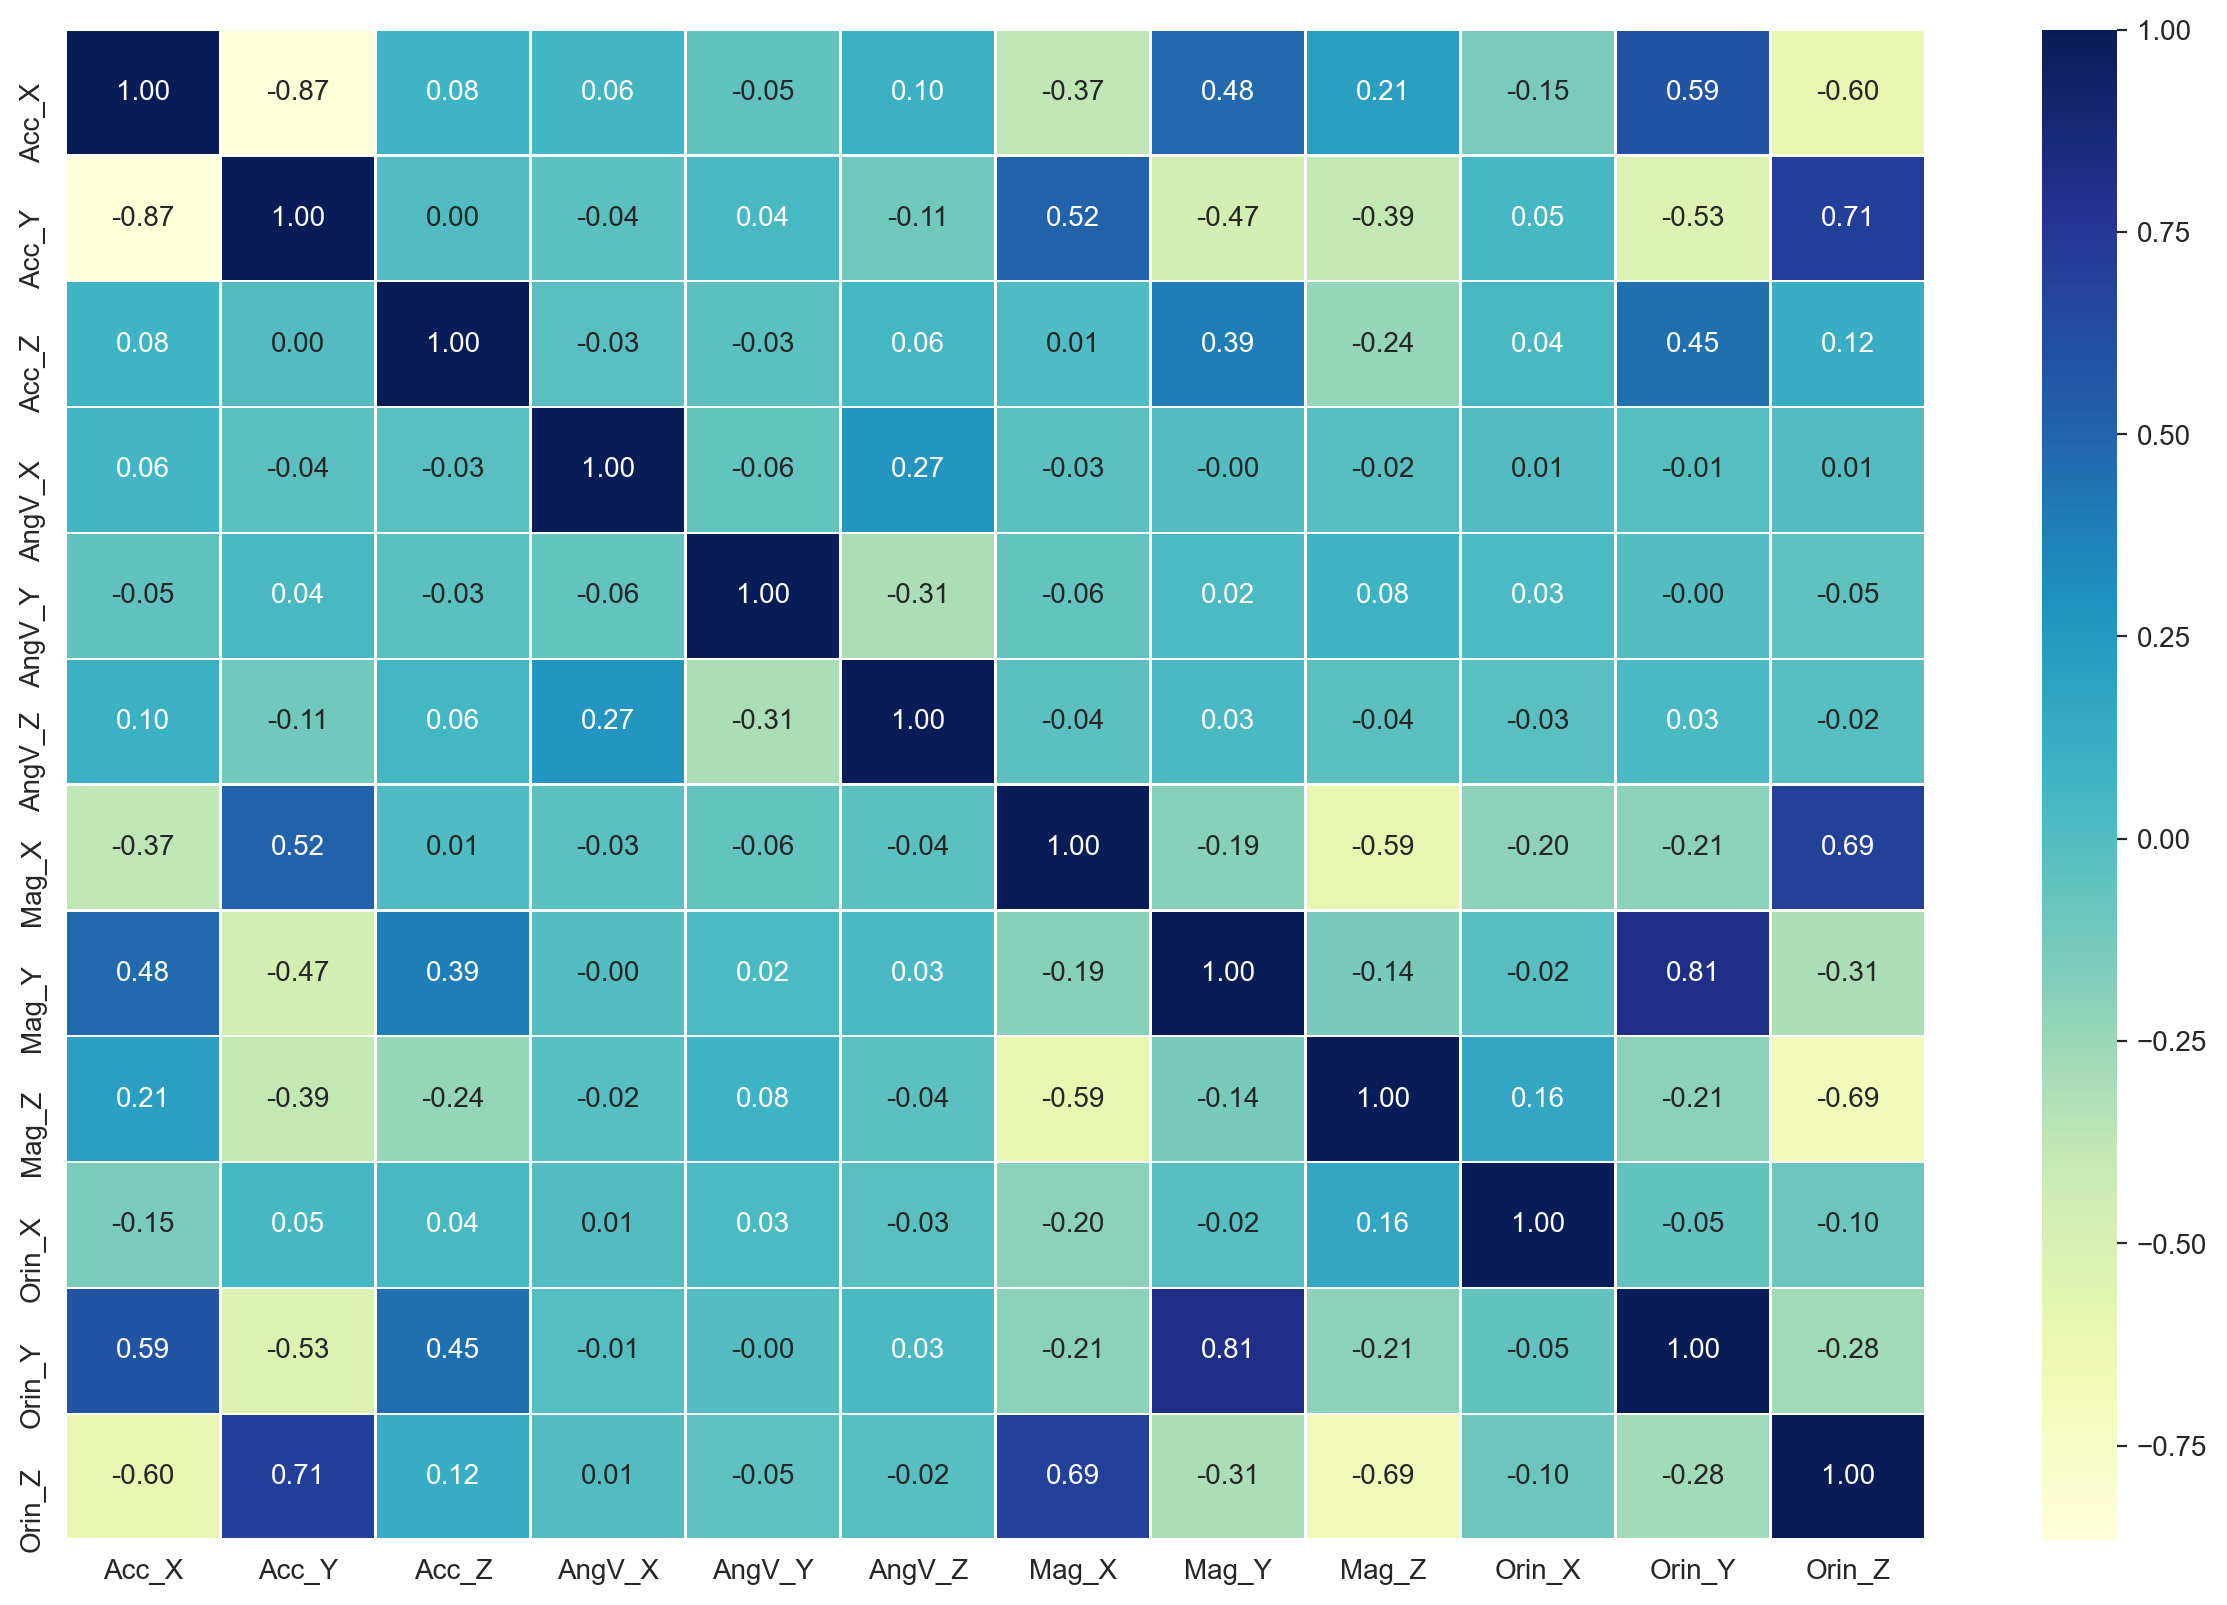

In [91]:
corr_matrix = All_activity.corr()
fig, ax = plt.subplots(figsize=(15,10),dpi=200)
ax = sb.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");


# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

# MACHINE LEARNING IMPLEMENTATION

In [92]:
All_activity.shape

(7253, 13)

In [93]:
All_activity.head()

Acc_X     Acc_Y      Acc_Z    AngV_X    AngV_Y    AngV_Z      Mag_X  \
0  1.229693  2.698888   9.723630  0.559261 -0.960100 -0.103176  16.100574   
1  0.393083  1.822610  10.601404  0.261506 -1.518713 -0.755855  14.173382   
2  0.165556  1.711840  10.223141 -0.449737 -0.831036 -1.708894  15.119671   
3  0.209714  1.868864   8.622370  0.178914 -0.602822 -1.520493  16.458759   
4  0.779579  1.484313   9.543255  0.188326 -0.798309 -1.841518  17.776455   

       Mag_Y      Mag_Z     Orin_X     Orin_Y     Orin_Z Activity  
0 -32.152283 -33.804287 -87.968027 -21.834471  10.506379  Walking  
1 -32.538319 -34.434101 -85.654733 -22.299156   7.025769  Walking  
2 -30.564014 -35.984112 -80.493293 -20.707061   6.217599  Walking  
3 -29.779381 -36.350750 -75.627193 -20.423837   6.103005  Walking  
4 -28.857830 -36.777538 -69.880713 -20.492917   6.033609  Walking

# SPLIT DATA

In [6]:
 # Split the data into X & y
X = All_activity.drop("Activity",axis = 1).values
y = All_activity["Activity"]

In [7]:
X

array([[1.229693, 2.698888, 9.723630, ..., -87.968027, -21.834471,
        10.506379],
       [0.393083, 1.822610, 10.601404, ..., -85.654733, -22.299156,
        7.025769],
       [0.165556, 1.711840, 10.223141, ..., -80.493293, -20.707061,
        6.217599],
       ...,
       [1.889371, 1.433719, 8.363109, ..., -86.925147, -15.556561,
        -1.107416],
       [0.257914, 1.940864, 8.489895, ..., -89.326880, -17.126124,
        1.670303],
       [1.593885, 2.556983, 9.089848, ..., -92.942680, -17.225523,
        0.510678]])

In [8]:
y

0        Walking
1        Walking
2        Walking
3        Walking
4        Walking
          ...   
7248    Swinging
7249    Swinging
7250    Swinging
7251    Swinging
7252    Swinging
Name: Activity, Length: 7253, dtype: object

# split into train and test data

In [9]:
np.random.seed(1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
print(f"""
x_train shape: {X_train.shape}, 
y_train shape: {y_train.shape},
X_test shape: {X_test.shape},
y_test shape: {y_test.shape}
""" )


x_train shape: (5802, 12), 
y_train shape: (5802,),
X_test shape: (1451, 12),
y_test shape: (1451,)



# Scaling the data

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train

array([[-0.336625, 0.585934, 0.248495, ..., -0.096220, 0.153318,
        0.575582],
       [-0.413432, 0.381058, -0.662379, ..., 0.873141, 0.309944,
        0.658226],
       [2.334230, -1.057591, 0.844520, ..., -0.222913, 1.684677,
        -1.282578],
       ...,
       [1.643559, -1.777185, 1.055108, ..., 0.299854, 2.081373,
        -2.027733],
       [0.202965, 0.215170, 1.521478, ..., 0.526704, 1.417838, 0.243159],
       [-0.672357, 0.420806, 0.080013, ..., 0.930597, -0.132126,
        0.615044]])

# trying three different machine learning models

In [13]:
# Put Modeles in a Dictionary

models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a Function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    This function is to fit and evaluate given machine learning moels.
    Models: a dictionary of different scikit-learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set Random seed
    np.random.seed(100)
    
    # Create a disctionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [14]:
model_scores = fit_and_score(models=models, 
                             X_train= X_train, 
                             X_test=X_test,
                            y_train= y_train,
                            y_test=y_test)

model_scores

{'Logistic Regression': 0.9062715368711234,
 'KNN': 0.9958649207443143,
 'Random Forest': 0.9931082012405238}

In [15]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])

print(model_compare)

          Logistic Regression       KNN  Random Forest
accuracy             0.906272  0.995865       0.993108


In [16]:
model_compare

Logistic Regression       KNN  Random Forest
accuracy             0.906272  0.995865       0.993108

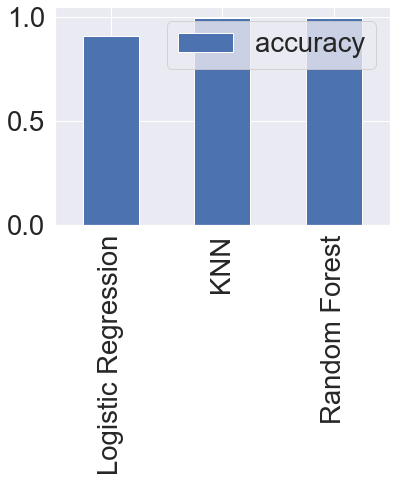

In [20]:
model_compare.T.plot.bar();

# HYPERPARAMETERS TUNING

In [21]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 5, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [22]:
# Tune LogisticRegression

np.random.seed(100)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=50,
                               verbose=True)


# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': array([0.000100, 0.000298, 0.000886, 0.002637, 0.007848, 0.023357,
       0.069519, 0.206914, 0.615848, 1.832981, 5.455595, 16.237767,
       48.329302, 143.844989, 428.133240, 1274.274986, 3792.690191,
       11288.378917, 33598.182863, 100000.000000]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [23]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 428.1332398719387}

# Tuning RandomForestClassifier().

In [24]:
# Setup random seed
np.random.seed(100)

# Setup random hypyerparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=50,
                          verbose=True)

# Fit random hyperparameter search model for randomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [25]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

In [26]:
rs_rf.score(X_test, y_test)

0.9924190213645762

# Hyperparameter Tuning with GridSearchCV

In [27]:
# Different hyperparameters for our LogisticsRegression model

log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}


# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# fit grid Hyperparameters  sear model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [28]:
# check the best hyperparameters
gs_log_reg.best_params_

{'C': 221.22162910704503, 'solver': 'liblinear'}

In [29]:
# Evaluate the grid search LogisticRegression Model
gs_log_reg.score(X_test, y_test)

0.8993797381116472

# Evaluting our tuned machine learning classifier, beyond accuracy

In [30]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [31]:
y_preds

array(['Walking', 'Swinging', 'Jumping', ..., 'Swinging', 'Jumping',
       'Walking'], dtype=object)

In [32]:
y_test

519      Walking
6054    Swinging
2802     Jumping
5303    Swinging
1802     Walking
          ...   
5517    Swinging
1119     Walking
5243    Swinging
3520     Jumping
1484     Walking
Name: Activity, Length: 1451, dtype: object

# Confusion matrix

In [33]:
print(confusion_matrix(y_test, y_preds))

[[393   7  53]
 [ 13 483   7]
 [ 66   0 429]]


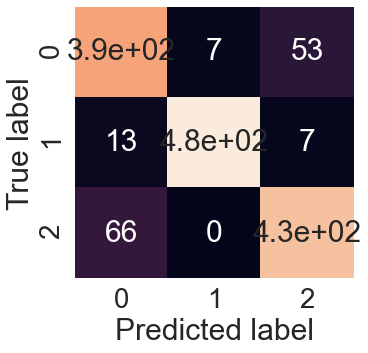

In [36]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=2.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

# Classification Report

In [124]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

     Jumping       0.83      0.87      0.85       453
    Swinging       0.99      0.96      0.97       503
     Walking       0.88      0.87      0.87       495

    accuracy                           0.90      1451
   macro avg       0.90      0.90      0.90      1451
weighted avg       0.90      0.90      0.90      1451



In [125]:
# Fit an instance of LogisticRegression

clf = LogisticRegression(C=221.22162910704503,
                        solver = 'liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=221.22162910704503, solver='liblinear')

# ARTIFICIAL NEURAL NETWORK

In [223]:
All_activity = pd.read_csv('All_Activity1.csv')

In [234]:
All_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Acc_X     7253 non-null   float64
 1   Acc_Y     7253 non-null   float64
 2   Acc_Z     7253 non-null   float64
 3   AngV_X    7253 non-null   float64
 4   AngV_Y    7253 non-null   float64
 5   AngV_Z    7253 non-null   float64
 6   Mag_X     7253 non-null   float64
 7   Mag_Y     7253 non-null   float64
 8   Mag_Z     7253 non-null   float64
 9   Orin_X    7253 non-null   float64
 10  Orin_Y    7253 non-null   float64
 11  Orin_Z    7253 non-null   float64
 12  Activity  7253 non-null   object 
dtypes: float64(12), object(1)
memory usage: 736.8+ KB


In [235]:
All_activity['Activity'].unique()

array(['Walking', 'Jumping', 'Swinging'], dtype=object)

In [225]:
#Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Activity_class = le.fit_transform(All_activity['Activity'])


In [236]:
Activity_class

array([2, 2, 2, ..., 1, 1, 1])

In [237]:
Activity_class.shape

(7253,)

# Selecting values for X and y

In [238]:
X= All_activity.iloc[:, :-1].values
y = Activity_class


In [240]:
All_activity.iloc[:, :-1]

Acc_X     Acc_Y      Acc_Z    AngV_X    AngV_Y    AngV_Z      Mag_X  \
0     1.229693  2.698888   9.723630  0.559261 -0.960100 -0.103176  16.100574   
1     0.393083  1.822610  10.601404  0.261506 -1.518713 -0.755855  14.173382   
2     0.165556  1.711840  10.223141 -0.449737 -0.831036 -1.708894  15.119671   
3     0.209714  1.868864   8.622370  0.178914 -0.602822 -1.520493  16.458759   
4     0.779579  1.484313   9.543255  0.188326 -0.798309 -1.841518  17.776455   
...        ...       ...        ...       ...       ...       ...        ...   
7248  0.609832  2.116449   9.305549  0.324816  1.008462  0.932844   8.229614   
7249  0.800086  1.981430   9.593999  0.069633  1.291180  1.282872  10.854137   
7250  1.889371  1.433719   8.363109  0.338086  2.483122  0.902026  14.236057   
7251  0.257914  1.940864   8.489895  0.448475  0.348781  1.213415  17.519337   
7252  1.593885  2.556983   9.089848 -0.413975  0.121180  1.222076  17.219299   

          Mag_Y      Mag_Z     Orin_X     Orin_Y     Orin_Z  
0    -32.152283 -33.804287 -87.968027 -21.834471  10.506379  
1    -32.538319 -34.434101 -85.654733 -22.299156   7.025769  
2    -30.564014 -35.984112 -80.493293 -20.707061   6.217599  
3    -29.779381 -36.350750 -75.627193 -20.423837   6.103005  
4    -28.857830 -36.777538 -69.880713 -20.492917   6.033609  
...         ...        ...        ...        ...        ...  
7248  -1.425409 -47.625797 -79.956638 -15.640605  -7.605880  
7249  -2.364454 -46.967564 -83.000247 -15.854919  -5.307518  
7250  -3.080599 -46.002186 -86.925147 -15.556561  -1.107416  
7251  -5.015430 -44.850376 -89.326880 -17.126124   1.670303  
7252  -5.992191 -44.827938 -92.942680 -17.225523   0.510678  

[7253 rows x 12 columns]

# Splitting the dataset into the Training and test set

In [241]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [242]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating encoding for the classes in the output data

In [243]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [244]:
y_train

array([[0.000000, 1.000000, 0.000000],
       [0.000000, 1.000000, 0.000000],
       [0.000000, 0.000000, 1.000000],
       ...,
       [0.000000, 0.000000, 1.000000],
       [1.000000, 0.000000, 0.000000],
       [1.000000, 0.000000, 0.000000]], dtype=float32)

# Neural Network (Training)

In [245]:
# Structure of the network
# we have 12 input features and 3 classes

(12 + 3) /2

7.5

In [246]:
# Neural network Strcuture  ====  12 -> 8 -> 8 -> 3

# Initializing the ANN
network = Sequential()

# Adding the input layer and the first hidden layer
network.add(Dense(input_shape = (12,), units = 8, activation = 'relu'))

#Adding the second hidden layer
network.add(Dense(units=8, activation='relu'))

# Adding the output layer
network.add(Dense(units = 3, activation='softmax'))


In [247]:
# Compiling the ANN
network.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [248]:
network.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 8)                 104       
                                                                 
 dense_22 (Dense)            (None, 8)                 72        
                                                                 
 dense_23 (Dense)            (None, 3)                 27        
                                                                 
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________


In [249]:
# Fit function initiates the training of the neural network - (Training the ANN on the Training set)

history = network.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
46/46 [==============================] - 3s 2ms/step - loss: 1.0950 - accuracy: 0.3976
Epoch 2/10
46/46 [==============================] - 0s 1ms/step - loss: 0.9502 - accuracy: 0.5455
Epoch 3/10
46/46 [==============================] - 0s 1ms/step - loss: 0.8233 - accuracy: 0.6637
Epoch 4/10
46/46 [==============================] - 0s 1ms/step - loss: 0.7035 - accuracy: 0.7561
Epoch 5/10
46/46 [==============================] - 0s 1ms/step - loss: 0.5923 - accuracy: 0.8183
Epoch 6/10
46/46 [==============================] - 0s 1ms/step - loss: 0.5028 - accuracy: 0.8482
Epoch 7/10
46/46 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.8659
Epoch 8/10
46/46 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.8787
Epoch 9/10
46/46 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.8888
Epoch 10/10
46/46 [==============================] - 0s 1ms/step - loss: 0.3196 - accuracy: 0.8961


In [250]:
# Fit function initiates the training of the neural network - (Training the ANN on the Training set)
history = network.fit(X_train, y_train, batch_size=105, epochs=20)

Epoch 1/20
56/56 [==============================] - 0s 1ms/step - loss: 0.2878 - accuracy: 0.9109
Epoch 2/20
56/56 [==============================] - 0s 1ms/step - loss: 0.2570 - accuracy: 0.9192
Epoch 3/20
56/56 [==============================] - 0s 1ms/step - loss: 0.2293 - accuracy: 0.9323
Epoch 4/20
56/56 [==============================] - 0s 1ms/step - loss: 0.2058 - accuracy: 0.9419
Epoch 5/20
56/56 [==============================] - 0s 1ms/step - loss: 0.1850 - accuracy: 0.9505
Epoch 6/20
56/56 [==============================] - 0s 1ms/step - loss: 0.1670 - accuracy: 0.9560
Epoch 7/20
56/56 [==============================] - 0s 1ms/step - loss: 0.1513 - accuracy: 0.9626
Epoch 8/20
56/56 [==============================] - 0s 1ms/step - loss: 0.1378 - accuracy: 0.9652
Epoch 9/20
56/56 [==============================] - 0s 1ms/step - loss: 0.1267 - accuracy: 0.9673
Epoch 10/20
56/56 [==============================] - 0s 1ms/step - loss: 0.1169 - accuracy: 0.9709
Epoch 11/20
56/56 [

# Neural network (evaluation)

In [251]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

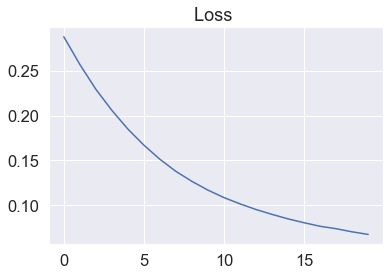

In [252]:
plt.plot(history.history['loss'])
plt.title('Loss ')
plt.show()

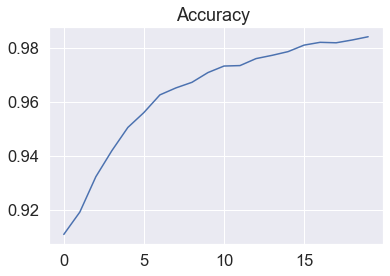

In [253]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy ')
plt.show()

In [254]:
accuracy_test = network.evaluate(X_test, y_test)

46/46 [==============================] - 0s 959us/step - loss: 0.0623 - accuracy: 0.9848


In [255]:
predictions = network.predict(X_test)

# we have 3 different values to be generated

In [256]:
predictions[0]

array([0.979377, 0.004028, 0.016595], dtype=float32)

In [257]:
 y_test[0]

array([1.000000, 0.000000, 0.000000], dtype=float32)

In [258]:
np.argmax(predictions[0])

0

In [259]:
print(All_activity['Activity'][np.argmax(predictions[0])])

Walking


In [260]:
All_activity.head()

Acc_X     Acc_Y      Acc_Z    AngV_X    AngV_Y    AngV_Z      Mag_X  \
0  1.229693  2.698888   9.723630  0.559261 -0.960100 -0.103176  16.100574   
1  0.393083  1.822610  10.601404  0.261506 -1.518713 -0.755855  14.173382   
2  0.165556  1.711840  10.223141 -0.449737 -0.831036 -1.708894  15.119671   
3  0.209714  1.868864   8.622370  0.178914 -0.602822 -1.520493  16.458759   
4  0.779579  1.484313   9.543255  0.188326 -0.798309 -1.841518  17.776455   

       Mag_Y      Mag_Z     Orin_X     Orin_Y     Orin_Z Activity  
0 -32.152283 -33.804287 -87.968027 -21.834471  10.506379  Walking  
1 -32.538319 -34.434101 -85.654733 -22.299156   7.025769  Walking  
2 -30.564014 -35.984112 -80.493293 -20.707061   6.217599  Walking  
3 -29.779381 -36.350750 -75.627193 -20.423837   6.103005  Walking  
4 -28.857830 -36.777538 -69.880713 -20.492917   6.033609  Walking

# Testing model on Unseen Dataset

In [262]:
Unseen_activity = pd.read_csv('All_Activity.csv')

In [263]:
Unseen_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Acc_X     7253 non-null   float64
 1   Acc_Y     7253 non-null   float64
 2   Acc_Z     7253 non-null   float64
 3   AngV_X    7253 non-null   float64
 4   AngV_Y    7253 non-null   float64
 5   AngV_Z    7253 non-null   float64
 6   Mag_X     7253 non-null   float64
 7   Mag_Y     7253 non-null   float64
 8   Mag_Z     7253 non-null   float64
 9   Orin_X    7253 non-null   float64
 10  Orin_Y    7253 non-null   float64
 11  Orin_Z    7253 non-null   float64
 12  Activity  7253 non-null   object 
dtypes: float64(12), object(1)
memory usage: 736.8+ KB


In [264]:
Unseen_activity.head()

Acc_X     Acc_Y      Acc_Z    AngV_X    AngV_Y    AngV_Z      Mag_X  \
0  1.229693  2.698888   9.723630  0.559261 -0.960100 -0.103176  16.100574   
1  0.393083  1.822610  10.601404  0.261506 -1.518713 -0.755855  14.173382   
2  0.165556  1.711840  10.223141 -0.449737 -0.831036 -1.708894  15.119671   
3  0.209714  1.868864   8.622370  0.178914 -0.602822 -1.520493  16.458759   
4  0.779579  1.484313   9.543255  0.188326 -0.798309 -1.841518  17.776455   

       Mag_Y      Mag_Z     Orin_X     Orin_Y     Orin_Z Activity  
0 -32.152283 -33.804287 -87.968027 -21.834471  10.506379  Walking  
1 -32.538319 -34.434101 -85.654733 -22.299156   7.025769  Walking  
2 -30.564014 -35.984112 -80.493293 -20.707061   6.217599  Walking  
3 -29.779381 -36.350750 -75.627193 -20.423837   6.103005  Walking  
4 -28.857830 -36.777538 -69.880713 -20.492917   6.033609  Walking

In [266]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

UnS_Act_class = le.fit_transform(Unseen_activity['Activity'])

In [267]:
UnS_Act_class

array([2, 2, 2, ..., 1, 1, 1])

In [268]:
# selecting x and y values for the unseen data

X_u= Unseen_activity.iloc[:, :-1].values
y_u = UnS_Act_class



# SCALING

In [269]:
X_u = sc.fit_transform(X_u)

In [270]:
# Encoding the classes 
y_u = np_utils.to_categorical(y_u)

In [271]:
y_u

array([[0.000000, 0.000000, 1.000000],
       [0.000000, 0.000000, 1.000000],
       [0.000000, 0.000000, 1.000000],
       ...,
       [0.000000, 1.000000, 0.000000],
       [0.000000, 1.000000, 0.000000],
       [0.000000, 1.000000, 0.000000]], dtype=float32)

In [272]:
Unseen_accuracy_test = network.evaluate(X_u, y_u)

227/227 [==============================] - 0s 889us/step - loss: 0.0650 - accuracy: 0.9843


LOSS IS 0.0650 ACCURACY IS 0.9843